# Debugging and performances

In [1]:
# Hidden cell
import os, sys
import numpy as np
import pandas as pd
import xarray as xr
print("xarray: %s, %s" % (xr.__version__, xr.__file__))

import matplotlib.pyplot as plt
%matplotlib inline
sys.path.insert(0, os.path.abspath('/Users/gmaze/git/github/gmaze/pyxpcm'))

import pyxpcm
print("pyxpcm: %s, %s" % (pyxpcm.__version__, pyxpcm.__file__))

xarray: 0.12.1, /Users/gmaze/anaconda/envs/obidam36/lib/python3.6/site-packages/xarray/__init__.py


pyxpcm: 0.4.0, /Users/gmaze/git/github/gmaze/pyxpcm/pyxpcm/__init__.py


## Import and set-up

Import the library and toy data

In [2]:
import pyxpcm
from pyxpcm.models import pcm

# Load a dataset to work with:
ds = pyxpcm.tutorial.open_dataset('argo').load()

# Define vertical axis and features to use:
z = np.arange(0.,-1000.,-10.)
features_pcm = {'temperature': z, 'salinity': z}
features_in_ds = {'temperature': 'TEMP', 'salinity': 'PSAL'}

## Debugging

Use option ``debug`` to print log messages 

In [3]:
# Instantiate a new PCM:
m = pcm(K=8, features=features_pcm, debug=True)

# Fit with log:
m.fit(ds, features=features_in_ds);

> Start preprocessing for action 'fit'



	> Preprocessing xarray dataset 'TEMP' as PCM feature 'temperature'


	 [<class 'xarray.core.dataarray.DataArray'>, <class 'dask.array.core.Array'>, ((7560,), (282,))] X RAVELED with success
		Output axis is in the input axis, not need to interpolate, simple intersection
	 [<class 'xarray.core.dataarray.DataArray'>, <class 'dask.array.core.Array'>, ((7560,), (100,))] X INTERPOLATED with success)


	 [<class 'xarray.core.dataarray.DataArray'>, <class 'numpy.ndarray'>, None] X SCALED with success)
	 [<class 'xarray.core.dataarray.DataArray'>, <class 'numpy.ndarray'>, None] X REDUCED with success)
	temperature pre-processed with success,  [<class 'xarray.core.dataarray.DataArray'>, <class 'numpy.ndarray'>, None]
	Homogenisation for fit of temperature

	> Preprocessing xarray dataset 'PSAL' as PCM feature 'salinity'


	 [<class 'xarray.core.dataarray.DataArray'>, <class 'dask.array.core.Array'>, ((7560,), (282,))] X RAVELED with success
		Output axis is in the input axis, not need to interpolate, simple intersection
	 [<class 'xarray.core.dataarray.DataArray'>, <class 'dask.array.core.Array'>, ((7560,), (100,))] X INTERPOLATED with success)


	 [<class 'xarray.core.dataarray.DataArray'>, <class 'numpy.ndarray'>, None] X SCALED with success)
	 [<class 'xarray.core.dataarray.DataArray'>, <class 'numpy.ndarray'>, None] X REDUCED with success)
	salinity pre-processed with success,  [<class 'xarray.core.dataarray.DataArray'>, <class 'numpy.ndarray'>, None]
	Homogenisation for fit of salinity
	Features array shape and type for xarray: (7560, 30) <class 'numpy.ndarray'> <class 'memoryview'>
> Preprocessing done, working with final X (<class 'xarray.core.dataarray.DataArray'>) array of shape: (7560, 30)  and sampling dimensions: ['N_PROF']


## Performance / Optimisation

Use ``timeit`` and ``timeit_verb`` to compute computation time of PCM operations

Times are accessible as a pandas Dataframe in ``timeit`` pyXpcm instance property.

The pyXpcm ``m.plot.timeit()`` plot method allows for a simple visualisation of times.

### Time readings during execution

In [4]:
# Create a PCM and execute methods:
m = pcm(K=8, features=features_pcm, timeit=True, timeit_verb=1)
m.fit(ds, features=features_in_ds);

  fit.1-preprocess.1-mask: 25 ms


  fit.1-preprocess.2-feature_temperature.1-ravel: 240 ms
  fit.1-preprocess.2-feature_temperature.2-interp: 1 ms


  fit.1-preprocess.2-feature_temperature.3-scale_fit: 446 ms


  fit.1-preprocess.2-feature_temperature.4-scale_transform: 219 ms
  fit.1-preprocess.2-feature_temperature.5-reduce_fit: 19 ms
  fit.1-preprocess.2-feature_temperature.6-reduce_transform: 4 ms
  fit.1-preprocess.2-feature_temperature.total: 932 ms
  fit.1-preprocess: 932 ms
  fit.1-preprocess.3-homogeniser: 1 ms


  fit.1-preprocess.2-feature_salinity.1-ravel: 223 ms
  fit.1-preprocess.2-feature_salinity.2-interp: 2 ms


  fit.1-preprocess.2-feature_salinity.3-scale_fit: 451 ms


  fit.1-preprocess.2-feature_salinity.4-scale_transform: 227 ms
  fit.1-preprocess.2-feature_salinity.5-reduce_fit: 15 ms
  fit.1-preprocess.2-feature_salinity.6-reduce_transform: 4 ms
  fit.1-preprocess.2-feature_salinity.total: 925 ms
  fit.1-preprocess: 925 ms
  fit.1-preprocess.3-homogeniser: 1 ms
  fit.1-preprocess.4-xarray: 1 ms
  fit.1-preprocess: 1889 ms


  fit.2-fit: 3230 ms
  fit.3-score: 15 ms
  fit: 5135 ms


### A posteriori Execution time analysis

In [5]:
# Create a PCM and execute methods:
m = pcm(K=8, features=features_pcm, timeit=True, timeit_verb=0)
m.fit(ds, features=features_in_ds);
m.predict(ds, features=features_in_ds);
m.fit_predict(ds, features=features_in_ds);

In [6]:
m.timeit

Method       Sub-method    Sub-sub-method         Sub-sub-sub-method
fit          1-preprocess  1-mask                 total                   47.559023
                           2-feature_temperature  1-ravel                276.102066
                                                  2-interp                 3.394842
                                                  3-scale_fit            505.740881
                                                  4-scale_transform      223.773956
                                                  5-reduce_fit            17.482996
                                                  6-reduce_transform       3.457069
                                                  total                 1030.169964
                           total                                        3957.222223
                           3-homogeniser          total                    3.419161
                           2-feature_salinity     1-ravel                221.151114
       

## Visualisation help

### Main steps by method

Sub-method,1-preprocess,2-fit,2-predict,3-score,3-xarray,4-predict,5-score,6-xarray,score
Method,,,,,,,,,
fit,7912.362337,1697.923183,NaN,12.112856,NaN,NaN,NaN,NaN,NaN
fit_predict,3649.995327,1729.376793,NaN,41.639090,NaN,36.171913,14.535189,527.815104,NaN
predict,3783.388376,NaN,11.608839,NaN,452.858925,NaN,NaN,NaN,14.286995


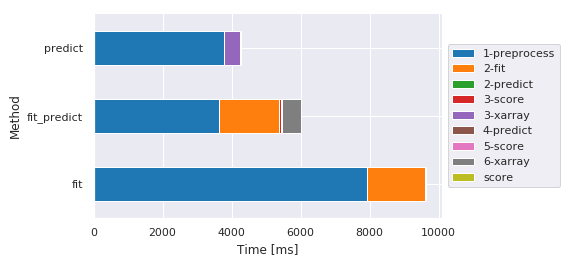

In [7]:
fig, ax, df = m.plot.timeit(group='Method', split='Sub-method', style='darkgrid') # Default group/split
df

### Preprocessing main steps by method

Sub-sub-method,1-mask,2-feature_salinity,2-feature_temperature,3-homogeniser,4-xarray
Method,,,,,
fit,47.559023,1842.871189,2060.121775,3.419161,1.168966
fit_predict,25.140047,886.129618,909.500360,2.276659,1.165867
predict,23.784876,925.936937,939.414024,0.750303,1.121044


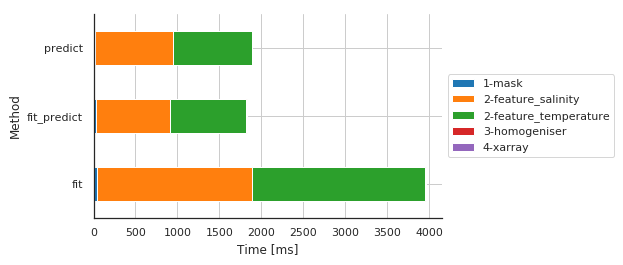

In [8]:
fig, ax, df = m.plot.timeit(group='Method', split='Sub-sub-method')
df

### Preprocessing details by method

Sub-sub-sub-method,1-ravel,2-interp,3-scale_fit,4-scale_transform,5-reduce_fit,6-reduce_transform
Method,,,,,,
fit,497.253180,4.995823,957.612991,449.885845,33.501148,8.039951
fit_predict,445.210934,2.223015,0.003099,441.771984,0.002623,8.464336
predict,472.041845,2.207279,0.001907,451.583862,0.004292,6.707907


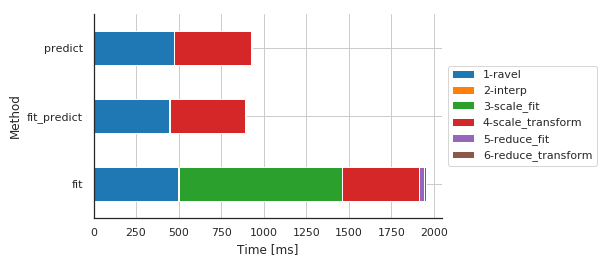

In [9]:
fig, ax, df = m.plot.timeit(group='Method', split='Sub-sub-sub-method')
df

### Preprocessing details by features

Sub-sub-sub-method,1-ravel,2-interp,3-scale_fit,4-scale_transform,5-reduce_fit,6-reduce_transform
Sub-sub-method,,,,,,
2-feature_salinity,0.680427,0.003813,0.451875,0.663835,0.016022,0.011264
2-feature_temperature,0.734079,0.005613,0.505743,0.679407,0.017486,0.011948


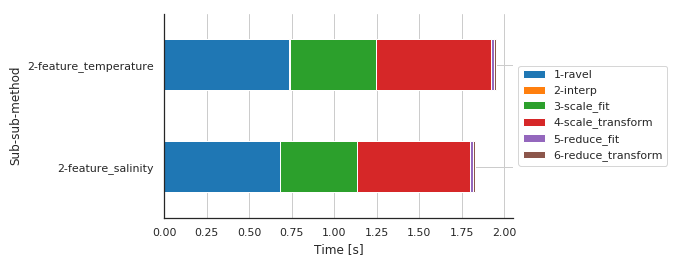

In [10]:
fig, ax, df = m.plot.timeit(split='Sub-sub-sub-method', group='Sub-sub-method', unit='s')
df